<a href="https://colab.research.google.com/github/Ashishjaiswal181/Google-Colab-Programs/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import math
import random

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
# MLxtend:
import mlxtend as ml
from mlxtend.plotting import plot_learning_curves

np.random.seed(1)

In [0]:
dd=pd.read_csv('/content/gdrive/My Drive/SUSY.csv',header=None)

In [0]:
dd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [0]:
dd.shape

(5000000, 19)

In [0]:
x=dd.iloc[:,[1,2,3,4,5,6,7,8,9,12,13,14,16,18]]
y=dd[0]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
         x, y, test_size=0.33, shuffle=True, random_state=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3350000, 14) (3350000,) (1650000, 14) (1650000,)


In [0]:
X_train.shape

(4000000, 18)

In [0]:
y_train.shape

(4000000,)

In [0]:
classifier=DecisionTreeClassifier()

In [0]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
classifier.score(X_test,y_test)

0.7141139393939394

In [0]:
y_predict=classifier.predict(X_test)

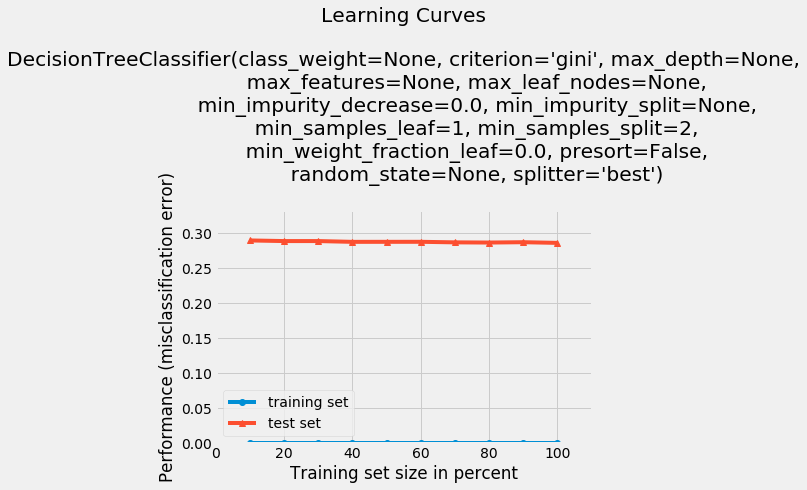

In [0]:
plot_learning_curves(X_train, y_train, X_test, y_test, classifier, scoring="misclassification error")
plt.show()

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74    894609
         1.0       0.69      0.69      0.69    755391

    accuracy                           0.71   1650000
   macro avg       0.71      0.71      0.71   1650000
weighted avg       0.71      0.71      0.71   1650000



In [0]:
classifier2 = BaggingClassifier(base_estimator=classifier, n_estimators=10, random_state=1)

In [0]:
classifier2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [0]:
y_predict2=classifier2.predict(X_test)

In [0]:
classifier2.score(X_test,y_test)

0.781410303030303

In [0]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81    894609
         1.0       0.81      0.68      0.74    755391

    accuracy                           0.78   1650000
   macro avg       0.79      0.77      0.78   1650000
weighted avg       0.79      0.78      0.78   1650000



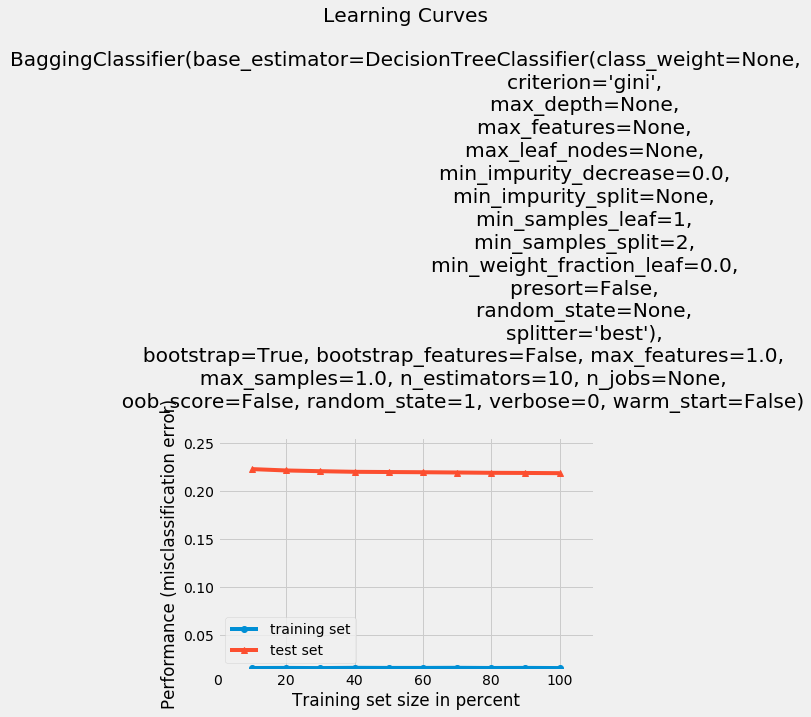

In [0]:
# Learning curves:
plot_learning_curves(X_train, y_train, X_test, y_test, classifier2, scoring="misclassification error")
plt.show()

In [0]:
# Confusion Matrix:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict))

Confusion Matrix:
 [[655743 238866]
 [232846 522545]]


In [0]:
# Cross Validation based multiple metric evaluation:
nfolds = 10
def tn(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[1, 1]

In [0]:
#
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'ac' : make_scorer(accuracy_score),
           're' : make_scorer(recall_score),
           'pr' : make_scorer(precision_score),
           'f1' : make_scorer(f1_score),
           'auc' : make_scorer(roc_auc_score),
          }  

In [0]:
#
cv_results = cross_validate(classifier, X_train, y_train, scoring=scoring, cv=StratifiedKFold(n_splits=nfolds, random_state=1))

In [0]:
# CV scores:
print('Cross Validation scores (nfolds = %d):'% nfolds)
print('tp: ', cv_results['test_tp'], '; mean:', cv_results['test_tp'].mean())
print('fn: ', cv_results['test_fn'], '; mean:', cv_results['test_fn'].mean())
print('fp: ', cv_results['test_fp'], '; mean:', cv_results['test_fp'].mean())
print('tn: ', cv_results['test_tn'], '; mean:', cv_results['test_tn'].mean())
print('ac: ', cv_results['test_ac'], '; mean:', cv_results['test_ac'].mean())
print('re: ', cv_results['test_re'], '; mean:', cv_results['test_re'].mean())
print('pr: ', cv_results['test_pr'], '; mean:', cv_results['test_pr'].mean())
print('f1: ', cv_results['test_f1'], '; mean:', cv_results['test_f1'].mean())
print('auc: ', cv_results['test_auc'], '; mean:', cv_results['test_auc'].mean())


Cross Validation scores (nfolds = 10):
tp:  [105676 106193 105668 105793 105836 105859 105954 106557 106177 105848] ; mean: 105956.1
fn:  [47568 47051 47576 47451 47408 47385 47289 46686 47066 47395] ; mean: 47287.5
fp:  [48723 49020 49146 48771 48604 48715 48748 49071 48689 48808] ; mean: 48829.5
tn:  [133034 132737 132611 132986 133152 133041 133008 132685 133067 132948] ; mean: 132926.9
ac:  [0.71256504 0.71322175 0.71127847 0.71277101 0.71339701 0.71313433
 0.71332153 0.71415736 0.71416333 0.71282601] ; mean: 0.7130835834722249
re:  [0.68959307 0.69296677 0.68954086 0.69035656 0.69063715 0.69078724
 0.69141168 0.69534661 0.69286688 0.69071997] ; mean: 0.6914226790902992
pr:  [0.68443448 0.68417594 0.68254809 0.68446081 0.68528879 0.68484351
 0.68489095 0.68469042 0.68560562 0.68440927] ; mean: 0.6845347867251087
f1:  [0.68700409 0.6885433  0.68602666 0.68739604 0.68795257 0.68780253
 0.68813587 0.68997737 0.68921713 0.68755014] ; mean: 0.6879605697477531
auc:  [0.71076318 0.7116330

In [0]:
# Confusion Matrix:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predict2))

Confusion Matrix:
 [[777607 117002]
 [243671 511720]]


In [0]:
# Cross Validation based multiple metric evaluation:
nfolds = 10
def tn(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[1, 1]

In [0]:
#
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'ac' : make_scorer(accuracy_score),
           're' : make_scorer(recall_score),
           'pr' : make_scorer(precision_score),
           'f1' : make_scorer(f1_score),
           'auc' : make_scorer(roc_auc_score),
          }  

In [0]:
#
cv_results = cross_validate(classifier2, X_train, y_train, scoring=scoring, cv=StratifiedKFold(n_splits=nfolds, random_state=1))

In [0]:
# CV scores:
print('Cross Validation scores (nfolds = %d):'% nfolds)
print('tp: ', cv_results['test_tp'], '; mean:', cv_results['test_tp'].mean())
print('fn: ', cv_results['test_fn'], '; mean:', cv_results['test_fn'].mean())
print('fp: ', cv_results['test_fp'], '; mean:', cv_results['test_fp'].mean())
print('tn: ', cv_results['test_tn'], '; mean:', cv_results['test_tn'].mean())
print('ac: ', cv_results['test_ac'], '; mean:', cv_results['test_ac'].mean())
print('re: ', cv_results['test_re'], '; mean:', cv_results['test_re'].mean())
print('pr: ', cv_results['test_pr'], '; mean:', cv_results['test_pr'].mean())
print('f1: ', cv_results['test_f1'], '; mean:', cv_results['test_f1'].mean())
print('auc: ', cv_results['test_auc'], '; mean:', cv_results['test_auc'].mean())


Cross Validation scores (nfolds = 10):
tp:  [103514 103979 103437 103658 104032 103530 103698 103887 103934 103965] ; mean: 103763.4
fn:  [49730 49265 49807 49586 49212 49714 49545 49356 49309 49278] ; mean: 49480.2
fp:  [23929 24168 23891 23860 23617 23907 23844 24015 24056 24019] ; mean: 23930.6
tn:  [157828 157589 157866 157897 158139 157849 157912 157741 157700 157737] ; mean: 157825.8
ac:  [0.78012304 0.78079767 0.78000663 0.78075886 0.7826     0.78023582
 0.7809277  0.78098144 0.78099935 0.78120233] ; mean: 0.780863284305855
re:  [0.67548485 0.67851922 0.67498238 0.67642453 0.67886508 0.67558926
 0.67668996 0.6779233  0.67823    0.67843229] ; mean: 0.6771140868651012
pr:  [0.81223763 0.81140409 0.81236649 0.81288916 0.81498484 0.81240142
 0.81304982 0.81223906 0.81204782 0.8123281 ] ; mean: 0.8125948425501235
f1:  [0.73757602 0.73903572 0.73732946 0.73840477 0.74072334 0.73770579
 0.7386292  0.7390279  0.7391309  0.73936713] ; mean: 0.7386930226367535
auc:  [0.77191552 0.77277524

In [0]:
from scipy.stats import t
from scipy import stats
acc1= [0.71256504, 0.71322175, 0.71127847, 0.71277101, 0.71339701, 0.71313433, 0.71332153, 0.71415736, 0.71416333, 0.71282601]
acc2= [0.78012304, 0.78079767, 0.78000663, 0.78075886, 0.7826, 0.78023582, 0.7809277, 0.78098144, 0.78099935, 0.78120233]
err1=np.subtract(1,acc1) #mean_acc1
err2=np.subtract(1,acc2) #mean_acc2
mean_err1, mean_err2 = np.mean(err1), np.mean(err2)
n1, n2 = len(err1) , len(err2)
df=n1+n2-2
alpha=0.05
cv=t.ppf(1.0-alpha,df)
t_stat , p=stats.ttest_ind(err1, err2, axis=0, equal_var=True)

In [0]:
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [0]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [0]:
from scipy.stats import t
from scipy import stats
acc1=  [0.78182752, 0.78257975, 0.78223946, 0.78316781, 0.78348358, 0.78261791, 0.7821486, 0.78365906, 0.78298741, 0.78214263]
acc2= [0.78012304, 0.78079767, 0.78000663, 0.78075886, 0.7826, 0.78023582, 0.7809277, 0.78098144, 0.78099935, 0.78120233]
err1=np.subtract(1,acc1) #mean_acc1
err2=np.subtract(1,acc2) #mean_acc2
mean_err1, mean_err2 = np.mean(err1), np.mean(err2)
n1, n2 = len(err1) , len(err2)
df=n1+n2-2
alpha=0.05
cv=t.ppf(1.0-alpha,df)
t_stat , p=stats.ttest_ind(err1, err2, axis=0, equal_var=True)

In [0]:
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [0]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.
